## ENPM673 Project 1
## Ankur Mahesh Chavan (achavan1@umd.edu)

## Problem 1.1:
In the given video, a red ball is thrown against a wall. Assuming that the trajectory of the ball follows
the equation of a parabola:
Detect and plot the pixel coordinates of the center point of the ball in the video.
(Hint: Read the video using OpenCV’s inbuilt function. For each frame, filter the red channel)

Code:

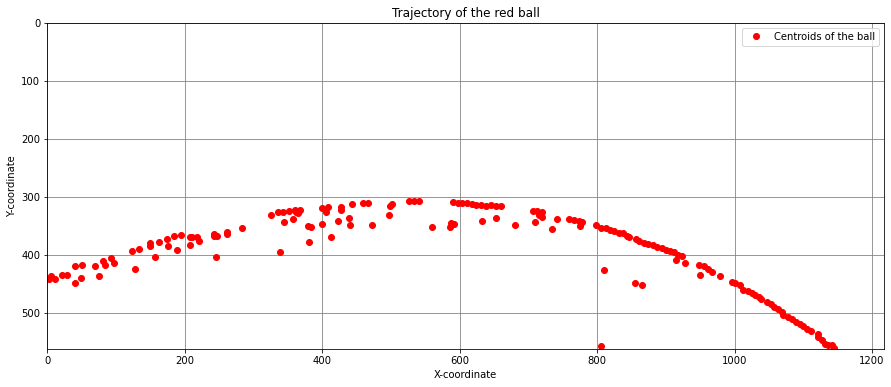

In [6]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Read the video
cap = cv2.VideoCapture('ball.mov')

# Define arrays to store the x and y coordinates of the centroid
x_vals = []
y_vals = []

# variable for size of the video frame
frame_height = []
frame_width = []

# Loop through each frame
while cap.isOpened():
    # Read the frame
    ret, frame = cap.read()
    
    # Check if end of video
    if not ret:
        break
        
    # Get size of the video frame
    frame_height = frame.shape[0]
    frame_width = frame.shape[1]
        
    # Convert to HSV color space
    hsv = cv2.cvtColor(frame, cv2.COLOR_BGR2HSV)
    
    # Threshold in the red range
    lower_red = np.array([0, 50, 50])
    upper_red = np.array([2, 255, 255])
    mask = cv2.inRange(hsv, lower_red, upper_red)
    
    # Create a Numpy array of all the red pixels in the frame
    red_pixels = np.argwhere(mask == 255)
    
    # Calculate the centroid of the red ball
    if len(red_pixels) > 0:
        cx = int(np.mean(red_pixels[:, 1]))
        cy = int(np.mean(red_pixels[:, 0]))
        x_vals.append(cx)
        y_vals.append(cy)
        cv2.circle(frame, (cx, cy), 5, (0, 255, 0), -1)
    
    # Show the original frame
    cv2.imshow('frame', frame)
    
    if cv2.waitKey(10) & 0xFF == ord('q'):
        break

# Release the video and close all windows
cap.release()
cv2.destroyAllWindows()

# Set the figure size
fig = plt.figure(figsize=(15, 6))

# Set the axis limits to match the size of the video frame
plt.xlim(0, frame_width)
plt.ylim(frame_height, 0)

# Plot the trajectory of the ball and the fitted curve
plt.plot(x_vals, y_vals,'o', label='Centroids of the ball', color = "red")
plt.title('Trajectory of the red ball')
plt.xlabel('X-coordinate')
plt.ylabel('Y-coordinate')
plt.legend()
plt.grid(color= "gray")
plt.show()

## Problem 1.2:
Use Standard Least Squares to fit a curve to the extracted coordinates. For the estimated
parabola you must,
a. Print the equation of the curve.
b. Plot the data with your best fit curve.

Code:

Equation of the fitted curve: y = [0.00055211]x^2 + [-0.55881395]x + [462.14774512]


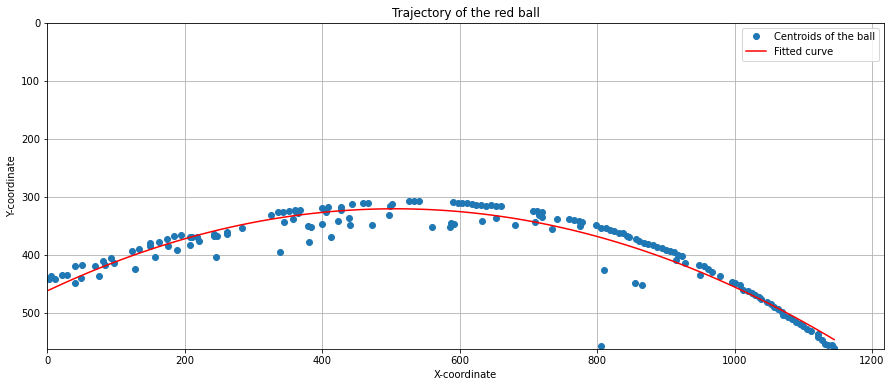

In [8]:
# Define the degree of the polynomial
degree = 2

x = np.array(x_vals)
y = np.array(y_vals)

# Construct the matrix A and the vector b
A = np.zeros((len(x_vals), degree+1))
for i in range(len(x_vals)):
    for j in range(degree+1):
        A[i, j] = x_vals[i]**j
b = np.reshape(y_vals, (-1, 1))

# Solve the Normal Equations
ATA = np.dot(A.T, A)
ATb = np.dot(A.T, b)
coefficients = np.dot(np.linalg.inv(ATA), ATb)
print("Equation of the fitted curve:", f"y = {coefficients[2]}x^2 + {coefficients[1]}x + {coefficients[0]}")

# Evaluate the polynomial at a range of x values
x_range = np.linspace(x.min(), x.max(), 100)
y_range = np.zeros_like(x_range)
for i in range(degree+1):
    y_range += coefficients[i]*x_range**i

# Set the figure size
fig = plt.figure(figsize=(15, 6))

# Set the axis limits to match the size of the video frame
plt.xlim(0, frame_width)
plt.ylim(frame_height, 0)

# Plot the grid lines
plt.grid(True)

# Plot the trajectory of the ball and the fitted curve
plt.plot(x_vals, y_vals,'o', label='Centroids of the ball')
plt.plot(x_range, y_range, label='Fitted curve', color='red' )
plt.title('Trajectory of the red ball')
plt.xlabel('X-coordinate')
plt.ylabel('Y-coordinate')
plt.legend()
plt.show()

## Problem 1.3:
Assuming that the origin of the video is at the top-left of the frame as shown below, compute
the x-coordinate of the ball’s landing spot in pixels, if the y-coordinate of the landing spot is
defined as 300 pixels greater than its first detected location. 

Code:

In [11]:
print("Ball first detected at x =", x.min())
print("Index of the first detected value:",np.argmin(x))
print("Corresponding y coordinate:", y[np.argmin(x)])

# Define the coefficients of the quadratic equation
a = 0.00055211
b = -0.55881395
c = 462.14774512

# Define the y value to find the corresponding x-coordinate for
# y_landing_coordinate = y coordinate of first detected postion + 300
# y_landing_coordinate = 442 + 300 = 742
y_landing_coordinate = 742

# Solve the quadratic equation to find the x-coordinates
x1 = (-b + np.sqrt(b**2 - 4*a*(c - y_landing_coordinate))) / (2*a)
x2 = (-b - np.sqrt(b**2 - 4*a*(c - y_landing_coordinate))) / (2*a)

# Print the x-coordinates
print("x1 =", x1)
print("x2 =", x2)

# x-coordinate of the desired landing spot is x1 as the coordinate cannot be negative
print("x-coordinate of desired landing spot is:", x1)

Ball first detected at x = 2
Index of the first detected value: 1
Corresponding y coordinate: 442
x1 = 1379.5617824710619
x2 = -367.41936519914134
x-coordinate of desired landing spot is: 1379.5617824710619


## Problem 2.1:
Given are two csv files, pc1.csv and pc2.csv, which contain noisy LIDAR point cloud data in the form
of (x, y, z) coordinates of the ground plane.
Using pc1.csv:
a. Compute the covariance matrix.
b. Assuming that the ground plane is flat, use the covariance matrix to compute the
magnitude and direction of the surface normal.

Code:

In [23]:
# Code for 2.1 a

import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns

# Read csv file
df=pd.read_csv("pc1.csv", header = None)
df.columns = ["A", "B", "C"]
df.head()
df.isnull().sum().sum()

# extract the three columns
x = df["A"]
y = df["B"]
z = df["C"]

# compute the mean of each column
mean_x = np.mean(x)
mean_y = np.mean(y)
mean_z = np.mean(z)

# compute the covariance matrix
cov_matrix = np.array([[np.sum((x - mean_x)*(x - mean_x)), np.sum((x - mean_x)*(y - mean_y)), np.sum((x - mean_x)*(z - mean_z))],
                      [np.sum((y - mean_y)*(x - mean_x)), np.sum((y - mean_y)*(y - mean_y)), np.sum((y - mean_y)*(z - mean_z))],
                      [np.sum((z - mean_z)*(x - mean_x)), np.sum((z - mean_z)*(y - mean_y)), np.sum((z - mean_z)*(z - mean_z))]])

# divide by the number of samples to get the sample covariance matrix
cov_matrix /= (len(data))
print("Covariance Matrix:")
print(cov_matrix)

Covariance Matrix:
[[ 33.7500586   -0.82513692 -11.39434956]
 [ -0.82513692  35.19218154 -23.23572298]
 [-11.39434956 -23.23572298  20.62765365]]


In [24]:
# Code for 2.1 b

# extract the three columns
x = df["A"]
y = df["B"]
z = df["C"]

# Finding the eigenvalues and eigenvectors
eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)

# Finding the eigenvector corresponding to minimum eigenvalue
min_eigenvalue_index = np.argmin(eigenvalues)
min_eigenvector = eigenvectors[:, min_eigenvalue_index]

# In our case the eigenvector corresponding to min eigenvalue is our surface normal
print("Surface Normal:", min_eigenvector)

# Direction
if min_eigenvector[2] > 0:
    direction = "up"
else:
    direction = "down"

# Print the direction of the surface normal
print("Surface normal direction:", direction)

Surface Normal: [0.28616428 0.53971234 0.79172003]
Surface normal direction: up


## Problem 2.2.a:
In this question, you will be required to implement various estimation algorithms such as
Standard Least Squares, Total Least Squares and RANSAC.
a. Using pc1.csv and pc2, fit a surface to the data using the standard least square
method and the total least square method. Plot the results (the surface) for each
method and explain your interpretation of the results.

Code:

solution:
-0.353955 x + -0.668551 y + 3.202554 = z


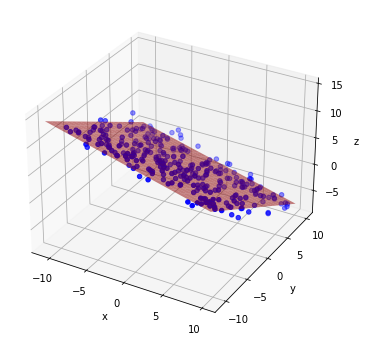

In [56]:
# Code for standard least square method on pc1.csv

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
from scipy.optimize import least_squares
import pandas as pd

# Step 1: Read a CSV file with 3 columns
data = pd.read_csv('pc1.csv', header=None)

# Column data
xs = data.iloc[:, 0]
ys = data.iloc[:, 1]
zs = data.iloc[:, 2]

# do fit
tmp_A = []
tmp_b = []
for i in range(len(xs)):
    tmp_A.append([xs[i], ys[i], 1])
    tmp_b.append(zs[i])
b = np.matrix(tmp_b).T
A = np.matrix(tmp_A)
fit = (A.T * A).I * A.T * b

print("solution:")
print("%f x + %f y + %f = z" % (fit[0], fit[1], fit[2]))

# plot plane
xlim = ax.get_xlim()
ylim = ax.get_ylim()
X,Y = np.meshgrid(np.arange(xlim[0], xlim[1]),
                  np.arange(ylim[0], ylim[1]))
Z = np.zeros(X.shape)
for r in range(X.shape[0]):
    for c in range(X.shape[1]):
        Z[r,c] = fit[0] * X[r,c] + fit[1] * Y[r,c] + fit[2]

# Set the figure size
fig = plt.figure(figsize=(15, 6))

ax = plt.subplot(111, projection='3d')
ax.scatter(xs, ys, zs, color='b')
ax.plot_surface(X,Y,Z, alpha = 0.5, color='red')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
plt.show()

solution:
(-0.251884) x + (-0.671737) y + (3.660257) = z


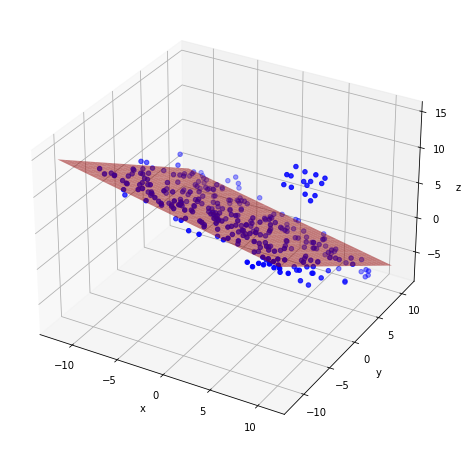

In [57]:
# Code for standard least square method on pc2.csv

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
from scipy.optimize import least_squares
import pandas as pd

# Step 1: Read a CSV file with 3 columns
df=pd.read_csv("pc2.csv", header = None)
df.columns = ["A", "B", "C"]

# extract the three columns
xs = df["A"]
ys = df["B"]
zs = df["C"]

# do fit
tmp_A = []
tmp_b = []
for i in range(len(xs)):
    tmp_A.append([xs[i], ys[i], 1])
    tmp_b.append(zs[i])
b = np.matrix(tmp_b).T
A = np.matrix(tmp_A)
fit = (A.T * A).I * A.T * b
errors = b - A * fit
residual = np.linalg.norm(errors)

print("solution:")
print("(%f) x + (%f) y + (%f) = z" % (fit[0], fit[1], fit[2]))

# plot plane
xlim = ax.get_xlim()
ylim = ax.get_ylim()
X,Y = np.meshgrid(np.arange(xlim[0], xlim[1]),
                  np.arange(ylim[0], ylim[1]))
Z = np.zeros(X.shape)
for r in range(X.shape[0]):
    for c in range(X.shape[1]):
        Z[r,c] = fit[0] * X[r,c] + fit[1] * Y[r,c] + fit[2]

# Set the figure size
fig = plt.figure(figsize=(17, 8))

ax = plt.subplot(111, projection='3d')
ax.scatter(xs, ys, zs, color='b')
ax.plot_surface(X,Y,Z, alpha = 0.5, color = "red")
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
plt.show()

Results:


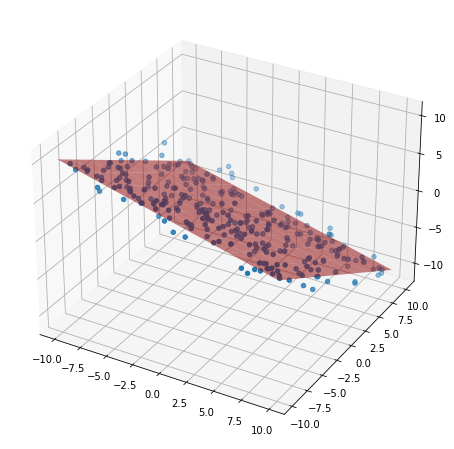

Error: 200.18342415325813


In [52]:
# Code for TLS for pc1.csv

import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns

df=pd.read_csv("pc1.csv", header = None)
df.columns = ["A", "B", "C"]
df.head()

# Extracting the columns
x = df["A"]
y = df["B"]
z = df["C"]

# Find the centriod of x y and z coordinates
centroid = np.array([np.mean(x), np.mean(y), np.mean(z)])

# Shifting the data to centriod
X_o = x - centroid[0]
Y_o = y - centroid[1]
Z_o= z - centroid[2]

# Calculating the A matrix
A_matrix = np.vstack((X_o, Y_o, Z_o)).T

# Calculate A^T@A
X_matrix = A_matrix.T @ A_matrix

# Calculating eigen values and eigen vectprs
eigenvalues, eigenvectors = np.linalg.eig(X_matrix)

# Finding the index belonging to smallest eigenvalue
index_min_eigenvalue = np.argmin(eigenvalues)

# Find eigenvector belonging to smallest eigenvalue
min_eigenvector = eigenvectors[:, index_min_eigenvalue]

# The x y and y components give the values of coefficent a b and c
c1 = min_eigenvector[0]
c2 = min_eigenvector[1]
c3 = min_eigenvector[2]

# Calculate d using this formula
c4 = c1*np.mean(X_o) + c2*np.mean(Y_o) + c3*np.mean(Z_o)

# Generate sequence of equally spaced points
x_plane, y_plane = np.meshgrid(np.linspace(X_o.min(), X_o.max(), 10),
                     np.linspace(Y_o.min(), Y_o.max(), 10))

# Find the z coordinate for these points using equation of plane
z_plane = (c4 - c1*x_plane - c2*y_plane)/c3

print("Results:")

# Plot the fitted plane
fig = plt.figure(figsize=(15,8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_o, Y_o, Z_o)
ax.plot_surface(x_plane, y_plane, z_plane, alpha=0.5, color = "red")
plt.show()

# Calculate the mean squared error
squared_error = np.sum((c1 * X_o + c2 * Y_o + c3 * Z_o - c4) ** 2)
print("Error:", squared_error)

Results:


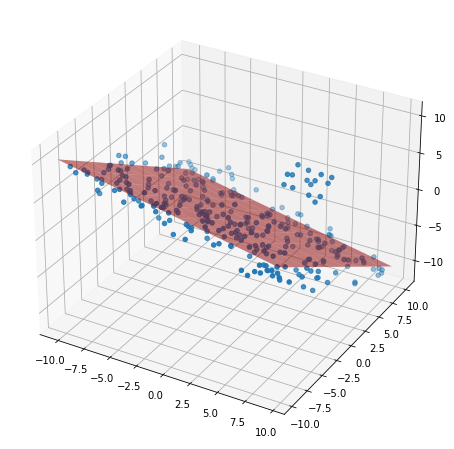

Error: 1143.470721938193


In [53]:
# Code for TLS for pc2,csv

import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns

df=pd.read_csv("pc2.csv", header = None)
df.columns = ["A", "B", "C"]
df.head()

# Extracting the columns
x = df["A"]
y = df["B"]
z = df["C"]

# Find the centriod of x y and z coordinates
centroid = np.array([np.mean(x), np.mean(y), np.mean(z)])

# Shifting the data to centriod
X_o = x - centroid[0]
Y_o = y - centroid[1]
Z_o= z - centroid[2]

# Calculating the A matrix
A_matrix = np.vstack((X_o, Y_o, Z_o)).T

# Calculate A^T@A
X_matrix = A_matrix.T @ A_matrix

# Calculating eigen values and eigen vectprs
eigenvalues, eigenvectors = np.linalg.eig(X_matrix)

# Finding the index belonging to smallest eigenvalue
index_min_eigenvalue = np.argmin(eigenvalues)

# Find eigenvector belonging to smallest eigenvalue
min_eigenvector = eigenvectors[:, index_min_eigenvalue]

# The x y and y components give the values of coefficent a b and c
c1 = min_eigenvector[0]
c2 = min_eigenvector[1]
c3 = min_eigenvector[2]

# Calculate d using this formula
d = c1*np.mean(X_o) + c2*np.mean(Y_o) + c3*np.mean(Z_o)

# Generate sequence of equally spaced points
x_plane, y_plane = np.meshgrid(np.linspace(X_o.min(), X_o.max(), 10),
                     np.linspace(Y_o.min(), Y_o.max(), 10))

# Find the z coordinate for these points using equation of plane
z_plane = (d - c1*x_plane - c2*y_plane)/c3

print("Results:")

# Plot the fitted plane
fig = plt.figure(figsize=(15,8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_o, Y_o, Z_o)
ax.plot_surface(x_plane, y_plane, z_plane, alpha=0.5, color = "red")
plt.show()

# Calculate the mean squared error
squared_error = np.sum((c1 * X_o + c2 * Y_o + c3 * Z_o - d) ** 2)
print("Error:", squared_error)

## Problem 2.2.a:

Results:


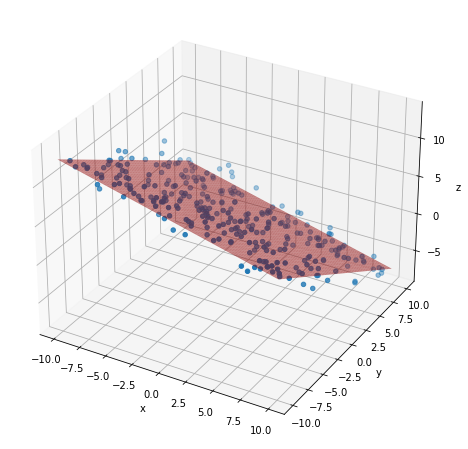

Error: 321.92331015779564


In [54]:
# Code for RANSAC for pc1.csv

# Import the necessary libaries
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

df=pd.read_csv("pc1.csv", header = None)
df.columns = ["A", "B", "C"]
df.head()


# Extracting the columns
x = df["A"]
y = df["B"]
z = df["C"]

# Converting to array
X_array = np.array(x)
Y_array = np.array(y)
Z_array = np.array(z)

# Defining the parameters for RANSAC Method

# No of Iterations
no_of_iter = 90000

# Distance to consider a point to be an inlier
threshold_dist = 0.8 

# Zero points can be inliner
inliners_in_best_model = -1    

for i in range(no_of_iter):
    
    # choosing random points
    rand_pts = np.random.choice(X_array.size, 3, replace=False)  

    sample_x = X_array[rand_pts]
    sample_y = Y_array[rand_pts]
    sample_z = Z_array[rand_pts]
    
    # Caculating matrix A and B from equation 
    A_matrix = np.vstack([sample_x, sample_y, np.ones(3)]).T                  
    B_matrix = sample_z
   
    # Solving the equation
    Coeff = np.linalg.solve(A_matrix, B_matrix)                                         
    
    # Coefficients 
    c1, c2, c3 = Coeff                                                        
    
     # Calculating the distance of all the points from the plane 
    dist_from_plane = np.abs( c1*X_array + c2 *Y_array - Z_array + c3)/np.sqrt( c1**2 + c2**2 + 1) 
    
    # Condition for inliner
    inliners = (dist_from_plane < threshold_dist).sum()        
    
    # Iterating for best inliners
    if inliners > inliners_in_best_model:                                   
        inliners_in_best_model = inliners                                   
        best_coefficient = Coeff

c1, c2, c3 = best_coefficient 

# Plot the fitted plane
fig = plt.figure(figsize = (15,8))
ax = fig.add_subplot(111, projection = '3d')
ax.scatter(X_array, Y_array, Z_array)

# Generate  equally spaced points
X, Y= np.meshgrid(np.linspace(X_array.min(), X_array.max(), 50), np.linspace(Y_array.min(), Y_array.max(), 50))

# Find the z coordinate for these points using equation of plane
Z = c1*X + c2*Y + c3
print("Results:")
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.plot_surface(X, Y, Z, alpha = 0.5, color = "red")
plt.show()

# Calculate the mean squared error
SSE_ransac = np.sum((c1 * X_array + c2 * Y_array + c3 - Z_array) ** 2)
print("Error:", SSE_ransac)

Results:


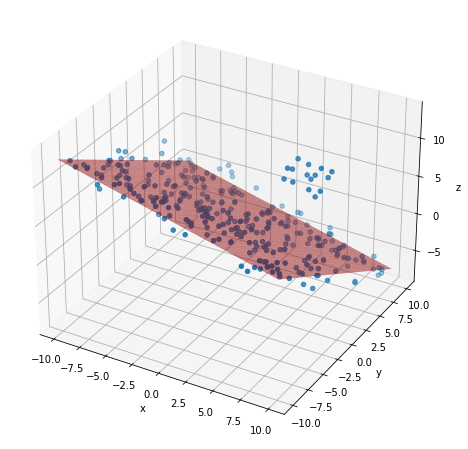

Error: 2032.9139558491515


In [55]:
# Code for RANSAC for pc2.csv

# Import the necessary libaries
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

df=pd.read_csv("pc2.csv", header = None)
df.columns = ["A", "B", "C"]
df.head()


# Extracting the columns
x = df["A"]
y = df["B"]
z = df["C"]

# Converting to array
X_array = np.array(x)
Y_array = np.array(y)
Z_array = np.array(z)

# Defining the parameters for RANSAC Method

# No of Iterations
no_of_iter = 90000

# Distance to consider a point to be an inlier
threshold_dist = 0.8 

# Zero points can be inliner
inliners_in_best_model = -1    

for i in range(no_of_iter):
    
    # choosing random points
    rand_pts = np.random.choice(X_array.size, 3, replace=False)  

    sample_x = X_array[rand_pts]
    sample_y = Y_array[rand_pts]
    sample_z = Z_array[rand_pts]
    
    # Caculating matrix A and B from equation 
    A_matrix = np.vstack([sample_x, sample_y, np.ones(3)]).T                  
    B_matrix = sample_z
   
    # Solving the equation
    Coeff = np.linalg.solve(A_matrix, B_matrix)                                         
    
    # Coefficients 
    c1, c2, c3 = Coeff                                                        
    
     # Calculating the distance of all the points from the plane 
    dist_from_plane = np.abs( c1*X_array + c2 *Y_array - Z_array + c3)/np.sqrt( c1**2 + c2**2 + 1) 
    
    # Condition for inliner
    inliners = (dist_from_plane < threshold_dist).sum()        
    
    # Iterating for best inliners
    if inliners > inliners_in_best_model:                                   
        inliners_in_best_model = inliners                                   
        best_coefficient = Coeff

c1, c2, c3 = best_coefficient 

# Plot the fitted plane
fig = plt.figure(figsize = (15,8))
ax = fig.add_subplot(111, projection = '3d')
ax.scatter(X_array, Y_array, Z_array)

# Generate  equally spaced points
X, Y= np.meshgrid(np.linspace(X_array.min(), X_array.max(), 50), np.linspace(Y_array.min(), Y_array.max(), 50))

# Find the z coordinate for these points using equation of plane
Z = c1*X + c2*Y + c3
print("Results:")
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.plot_surface(X, Y, Z, alpha = 0.5, color = "red")
plt.show()

# Calculate the mean squared error
SSE_ransac = np.sum((c1 * X_array + c2 * Y_array + c3 - Z_array) ** 2)
print("Error:", SSE_ransac)